In [1]:
# SEO Content Detector - Quality Modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import joblib


In [2]:
# Load your processed features
df = pd.read_csv("features.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (81, 47)


url  \
0     https://www.cm-alliance.com/cybersecurity-blog   
1    https://www.varonis.com/blog/cybersecurity-tips   
2  https://www.cisecurity.org/insights/blog/11-cy...   
3  https://www.cisa.gov/topics/cybersecurity-best...   
4  https://www.qnbtrust.bank/Resources/Learning-C...   

                                        cleaned_text  word_count  char_count  \
0  cyber security blog img  height width styledis...        2452       16465   
1  top  cybersecurity awareness tips how to stay ...        2452       15965   
2  cyber defense tips to stay secure at work and ...        1484        9450   
3  cybersecurity best practices  cybersecurity an...        1158        8396   
4                                                NaN           1           3   

   avg_word_length  unique_word_ratio  sentiment_polarity  \
0         6.714927           0.401141            0.127293   
1         6.511011           0.359560            0.194096   
2         6.367925           0.401347            0.188998   
3         7.250432           0.435720            0.224229   
4         3.000000           0.500000            0.000000   

   sentiment_subjectivity  flesch_reading_ease  smog_index  ...  tfidf_new  \
0                0.451831         -2440.380237  138.196593  ...   0.096966   
1                0.531520         -2438.965636  141.655835  ...   0.012443   
2                0.451673         -1447.988073   99.571357  ...   0.039653   
3                0.428644         -1148.693549  112.121352  ...   0.000000   
4                0.000000                  NaN         NaN  ...   0.000000   

   tfidf_online  tfidf_original  tfidf_retrieved  tfidf_right  tfidf_search  \
0      0.175294             0.0              0.0     0.067717      0.026208   
1      0.000000             0.0              0.0     0.034758      0.000000   
2      0.191159             0.0              0.0     0.000000      0.042869   
3      0.147425             0.0              0.0     0.000000      0.066123   
4      0.000000             0.0              0.0     0.000000      0.000000   

   tfidf_security  tfidf_social  tfidf_time  tfidf_use  
0        0.661174      0.120213    0.115244   0.119668  
1        0.462779      0.061704    0.000000   0.135133  
2        0.688240      0.000000    0.000000   0.391496  
3        0.909912      0.000000    0.072692   0.181157  
4        0.000000      0.000000    0.000000   0.000000  

[5 rows x 47 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          81 non-null     object 
 1   cleaned_text                 69 non-null     object 
 2   word_count                   81 non-null     int64  
 3   char_count                   81 non-null     int64  
 4   avg_word_length              81 non-null     float64
 5   unique_word_ratio            81 non-null     float64
 6   sentiment_polarity           81 non-null     float64
 7   sentiment_subjectivity       81 non-null     float64
 8   flesch_reading_ease          69 non-null     float64
 9   smog_index                   69 non-null     float64
 10  automated_readability_index  69 non-null     float64
 11  keyword_density_security     81 non-null     float64
 12  keyword_density_ai           81 non-null     float64
 13  keyword_density_cloud 

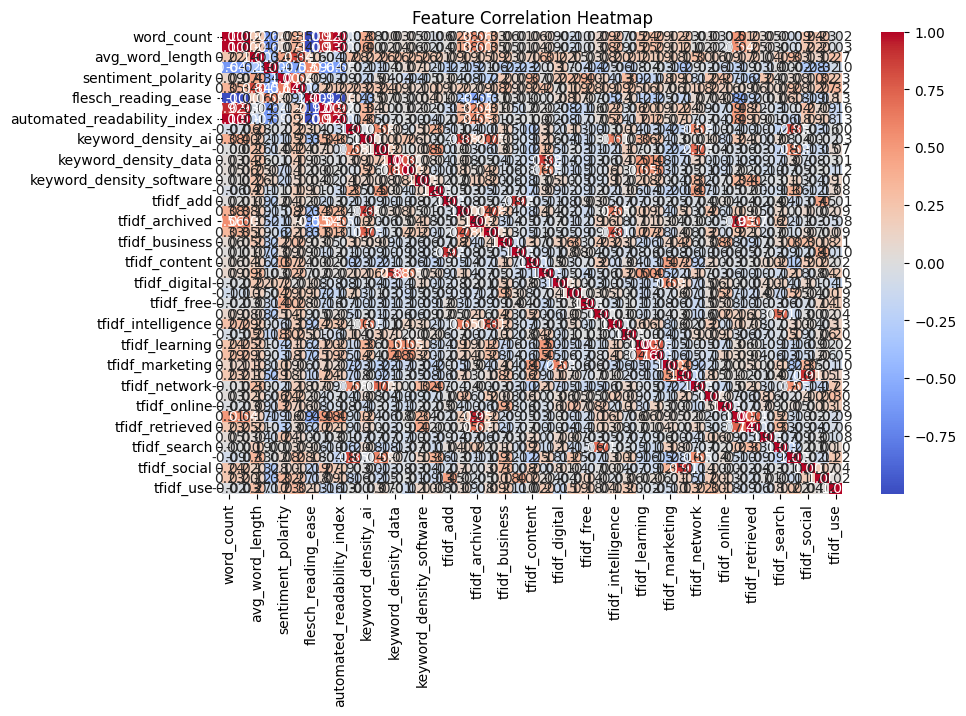

In [3]:

df.info()
print("\nMissing values per column:\n", df.isna().sum())


df.describe().T

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
import pandas as pd

df = pd.read_csv("features.csv")
print(df.shape)
print(df.columns)
df.head()


(81, 47)
Index(['url', 'cleaned_text', 'word_count', 'char_count', 'avg_word_length',
       'unique_word_ratio', 'sentiment_polarity', 'sentiment_subjectivity',
       'flesch_reading_ease', 'smog_index', 'automated_readability_index',
       'keyword_density_security', 'keyword_density_ai',
       'keyword_density_cloud', 'keyword_density_data',
       'keyword_density_analysis', 'keyword_density_software', 'tfidf_access',
       'tfidf_add', 'tfidf_ai', 'tfidf_archived', 'tfidf_artificial',
       'tfidf_business', 'tfidf_cart', 'tfidf_content', 'tfidf_data',
       'tfidf_digital', 'tfidf_email', 'tfidf_free', 'tfidf_google',
       'tfidf_intelligence', 'tfidf_learn', 'tfidf_learning', 'tfidf_machine',
       'tfidf_marketing', 'tfidf_media', 'tfidf_network', 'tfidf_new',
       'tfidf_online', 'tfidf_original', 'tfidf_retrieved', 'tfidf_right',
       'tfidf_search', 'tfidf_security', 'tfidf_social', 'tfidf_time',
       'tfidf_use'],
      dtype='object')


url  \
0     https://www.cm-alliance.com/cybersecurity-blog   
1    https://www.varonis.com/blog/cybersecurity-tips   
2  https://www.cisecurity.org/insights/blog/11-cy...   
3  https://www.cisa.gov/topics/cybersecurity-best...   
4  https://www.qnbtrust.bank/Resources/Learning-C...   

                                        cleaned_text  word_count  char_count  \
0  cyber security blog img  height width styledis...        2452       16465   
1  top  cybersecurity awareness tips how to stay ...        2452       15965   
2  cyber defense tips to stay secure at work and ...        1484        9450   
3  cybersecurity best practices  cybersecurity an...        1158        8396   
4                                                NaN           1           3   

   avg_word_length  unique_word_ratio  sentiment_polarity  \
0         6.714927           0.401141            0.127293   
1         6.511011           0.359560            0.194096   
2         6.367925           0.401347            0.188998   
3         7.250432           0.435720            0.224229   
4         3.000000           0.500000            0.000000   

   sentiment_subjectivity  flesch_reading_ease  smog_index  ...  tfidf_new  \
0                0.451831         -2440.380237  138.196593  ...   0.096966   
1                0.531520         -2438.965636  141.655835  ...   0.012443   
2                0.451673         -1447.988073   99.571357  ...   0.039653   
3                0.428644         -1148.693549  112.121352  ...   0.000000   
4                0.000000                  NaN         NaN  ...   0.000000   

   tfidf_online  tfidf_original  tfidf_retrieved  tfidf_right  tfidf_search  \
0      0.175294             0.0              0.0     0.067717      0.026208   
1      0.000000             0.0              0.0     0.034758      0.000000   
2      0.191159             0.0              0.0     0.000000      0.042869   
3      0.147425             0.0              0.0     0.000000      0.066123   
4      0.000000             0.0              0.0     0.000000      0.000000   

   tfidf_security  tfidf_social  tfidf_time  tfidf_use  
0        0.661174      0.120213    0.115244   0.119668  
1        0.462779      0.061704    0.000000   0.135133  
2        0.688240      0.000000    0.000000   0.391496  
3        0.909912      0.000000    0.072692   0.181157  
4        0.000000      0.000000    0.000000   0.000000  

[5 rows x 47 columns]

In [12]:
import pandas as pd

duplicates = pd.read_csv("duplicates.csv")
print(duplicates.head())
print(duplicates.columns)


                                               url_1  \
0  https://www.qnbtrust.bank/Resources/Learning-C...   
1  https://towardsdatascience.com/machine-learnin...   
2  https://support.microsoft.com/en-us/windows/ho...   
3  https://support.microsoft.com/en-us/windows/ho...   
4  https://support.microsoft.com/en-us/windows/ho...   

                                               url_2  similarity_score  
0  https://www.connectwise.com/blog/phishing-prev...               1.0  
1      https://www.cnbc.com/artificial-intelligence/               1.0  
2  https://www.reuters.com/technology/artificial-...               1.0  
3      https://www.cnbc.com/artificial-intelligence/               1.0  
4       https://www.bbc.com/news/topics/c404v061z99t               1.0  
Index(['url_1', 'url_2', 'similarity_score'], dtype='object')


In [19]:
# =========================================
# 🔹 QUALITY SCORING PIPELINE (Auto Safe Version)
# =========================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# ------------------------------------
# Step 1: Load Data
# ------------------------------------
df = pd.read_csv("extracted_content.csv")
duplicates = pd.read_csv("duplicates.csv")

print(f"Loaded {len(df)} records and {len(duplicates)} duplicate pairs.")

# ------------------------------------
# Step 2: Create a Duplicate Penalty Column
# ------------------------------------
df['duplicate_score'] = 0.0  # default: no penalty

if {'url_1', 'url_2'}.issubset(duplicates.columns):
    duplicate_urls = set(duplicates['url_1']).union(set(duplicates['url_2']))
    if 'url' in df.columns:
        df.loc[df['url'].isin(duplicate_urls), 'duplicate_score'] = 1.0
else:
    if {'id_1', 'id_2'}.issubset(duplicates.columns):
        duplicate_ids = set(duplicates['id_1']).union(set(duplicates['id_2']))
        df.loc[df.index.isin(duplicate_ids), 'duplicate_score'] = 1.0

# ------------------------------------
# Step 3: Handle Missing or Missing Columns
# ------------------------------------
expected_cols = ['sentiment_polarity', 'flesch_reading_ease']

# Create missing columns if not present
for col in expected_cols:
    if col not in df.columns:
        print(f" Column '{col}' not found. Creating with default 0 values.")
        df[col] = 0.0
    df[col] = df[col].fillna(df[col].mean())

# ------------------------------------
# Step 4: Normalize Columns (Only if Valid)
# ------------------------------------
scaler = MinMaxScaler()
cols_to_scale = [col for col in expected_cols if df[col].dtype in [np.float64, np.int64]]

if cols_to_scale:
    df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
else:
    print("")

# ------------------------------------
# Step 5: Compute Quality Score
# ------------------------------------
df['quality_score'] = (
    0.4 * df['sentiment_polarity'] +
    0.4 * df['flesch_reading_ease'] +
    0.2 * (1 - df['duplicate_score'])  # Penalize duplicates
)

# ------------------------------------
# Step 6: Sort and Save Results
# ------------------------------------
df = df.sort_values(by='quality_score', ascending=False)
output_path = "final_quality_scores.csv"
df.to_csv(output_path, index=False)



Loaded 81 records and 66 duplicate pairs.
 Column 'sentiment_polarity' not found. Creating with default 0 values.
 Column 'flesch_reading_ease' not found. Creating with default 0 values.


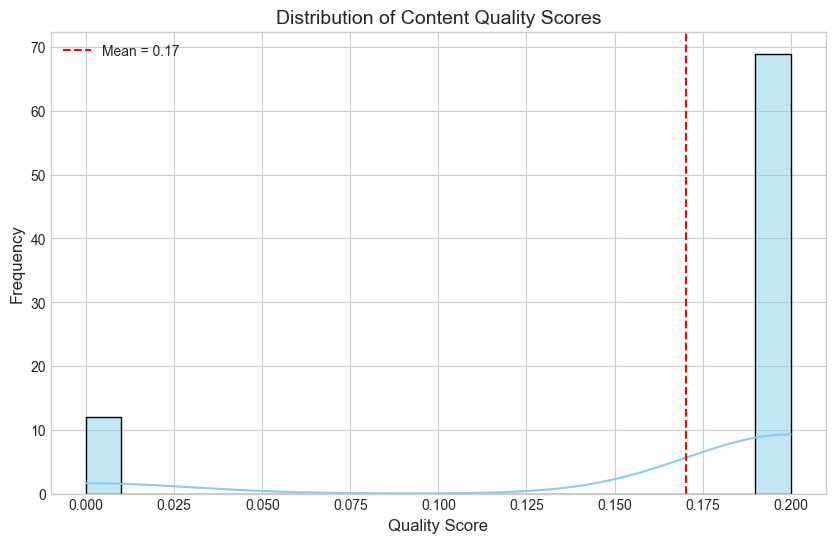

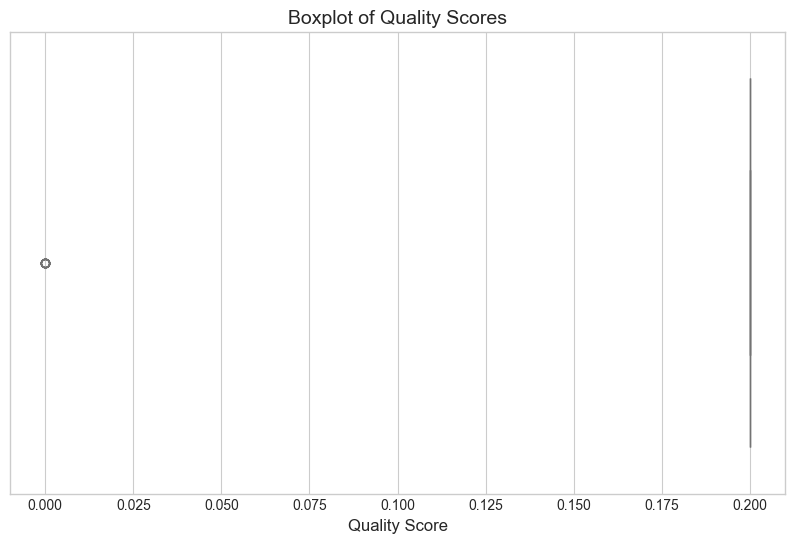


Low-quality threshold = 0.20
Low-quality pages: 12 / 81

Top 5 High-Quality Pages:
                                                                                        url  quality_score
                                             https://www.cm-alliance.com/cybersecurity-blog            0.2
                                                            https://www.dealsofamerica.com/            0.2
https://www.shopmissa.com/?srsltid=AfmBOoqr-F6zzKR-vGPqksAZp1wW4niXlINdN2eAREiMVNtHez_0-gAB            0.2
                                                                      https://www.woot.com/            0.2
                                 https://www.shopify.com/blog/ecommerce-seo-beginners-guide            0.2

Bottom 5 Low-Quality Pages:
                                                                                  url  quality_score
       https://www.qnbtrust.bank/Resources/Learning-Center/Blog/7-cyber-security-tips            0.0
                                        htt

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'figure.figsize': (10, 6), 'axes.titlesize': 14, 'axes.labelsize': 12})

# 1. Distribution of Quality Scores
plt.figure()
sns.histplot(df['quality_score'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Content Quality Scores")
plt.xlabel("Quality Score")
plt.ylabel("Frequency")
plt.axvline(df['quality_score'].mean(), color='red', linestyle='--', label=f"Mean = {df['quality_score'].mean():.2f}")
plt.legend()
plt.show()

# 2. Boxplot for Outlier View
plt.figure()
sns.boxplot(x=df['quality_score'], color='lightgreen')
plt.title("Boxplot of Quality Scores")
plt.xlabel("Quality Score")
plt.show()

# 3. Identify Low-Quality Pages (below 40th percentile)
threshold = df['quality_score'].quantile(0.4)
low_quality = df[df['quality_score'] < threshold]
high_quality = df[df['quality_score'] >= threshold]

print(f"\nLow-quality threshold = {threshold:.2f}")
print(f"Low-quality pages: {len(low_quality)} / {len(df)}")

# Save subsets
low_quality.to_csv("low_quality_pages.csv", index=False)
high_quality.to_csv("high_quality_pages.csv", index=False)

# 4. Display Top and Bottom Pages
print("\nTop 5 High-Quality Pages:")
print(high_quality[['url', 'quality_score']].head().to_string(index=False))

print("\nBottom 5 Low-Quality Pages:")
print(low_quality[['url', 'quality_score']].head().to_string(index=False))


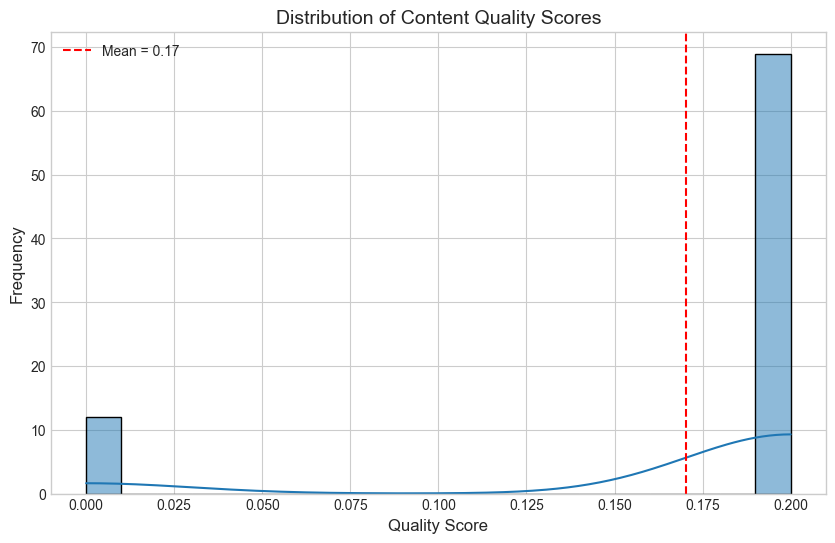

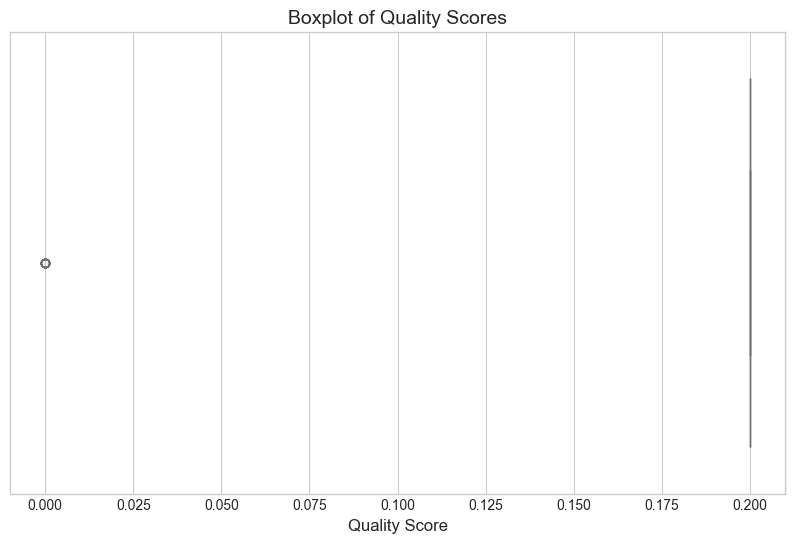


 Top 5 Pages by Quality Score:

                                                                                        url  quality_score
                                             https://www.cm-alliance.com/cybersecurity-blog            0.2
                                                            https://www.dealsofamerica.com/            0.2
https://www.shopmissa.com/?srsltid=AfmBOoqr-F6zzKR-vGPqksAZp1wW4niXlINdN2eAREiMVNtHez_0-gAB            0.2
                                                                      https://www.woot.com/            0.2
                                 https://www.shopify.com/blog/ecommerce-seo-beginners-guide            0.2


In [16]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'figure.figsize': (10, 6), 'axes.titlesize': 14, 'axes.labelsize': 12})


plt.figure()
sns.histplot(df['quality_score'], bins=20, kde=True)
plt.title("Distribution of Content Quality Scores")
plt.xlabel("Quality Score")
plt.ylabel("Frequency")
plt.axvline(df['quality_score'].mean(), color='red', linestyle='--', label=f"Mean = {df['quality_score'].mean():.2f}")
plt.legend()
plt.show()

plt.figure()
sns.boxplot(x=df['quality_score'], color='skyblue')
plt.title("Boxplot of Quality Scores")
plt.xlabel("Quality Score")
plt.show()

top_n = 5
print(f"\n Top {top_n} Pages by Quality Score:\n")
print(df[['url', 'quality_score']].head(top_n).to_string(index=False))


# Model Building

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import joblib
import requests
from bs4 import BeautifulSoup
import textstat
import re


In [47]:
features = pd.read_csv("features.csv")

# Drop rows with no text or numeric issues
features = features.dropna(subset=['word_count'], how='any')

In [48]:
def quality_label(row):
    if row['word_count'] > 1500 and 50 <= row['flesch_reading_ease'] <= 70:
        return 'High'
    elif row['word_count'] < 500 or row['flesch_reading_ease'] < 30:
        return 'Low'
    else:
        return 'Medium'

features['label'] = features.apply(quality_label, axis=1)

In [49]:
num_cols = ['word_count', 'sentence_count', 'flesch_reading_ease']
num_cols = [c for c in num_cols if c in features.columns]
X = features[num_cols].fillna(0)
y = features['label']

In [50]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [54]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# ------------------------------------
# STEP 1: Load the Datasets
# ------------------------------------
features = pd.read_csv("extracted_content.csv")
duplicates = pd.read_csv("duplicates.csv")

print(f" Loaded features: {features.shape}, duplicates: {duplicates.shape}")

# ------------------------------------
# STEP 2: Handle Missing Values
# ------------------------------------
features = features.fillna(0)

# ------------------------------------
# STEP 3: Create Duplicate Penalty
# ------------------------------------
features['duplicate_score'] = 0.0

if {'url_1', 'url_2'}.issubset(duplicates.columns):
    dup_urls = set(duplicates['url_1']).union(set(duplicates['url_2']))
    features.loc[features['url'].isin(dup_urls), 'duplicate_score'] = 1.0

# ------------------------------------
# STEP 4: Select and Normalize Core Features
# ------------------------------------
numeric_cols = ['word_count', 'flesch_reading_ease', 'sentiment_polarity']
for col in numeric_cols:
    if col not in features.columns:
        features[col] = 0.0

scaler = MinMaxScaler()
features[numeric_cols] = scaler.fit_transform(features[numeric_cols])

# ------------------------------------
# STEP 5: Generate Quality Labels
# ------------------------------------
def quality_label(row):
    if row['word_count'] > 0.7 and 0.4 <= row['flesch_reading_ease'] <= 0.8:
        return 'High'
    elif row['word_count'] < 0.3 or row['flesch_reading_ease'] < 0.3:
        return 'Low'
    else:
        return 'Medium'

features['label'] = features.apply(quality_label, axis=1)

print("\nLabel distribution:")
print(features['label'].value_counts())

# ------------------------------------
# STEP 6: Prepare Data for Model
# ------------------------------------
X = features[['word_count', 'flesch_reading_ease', 'sentiment_polarity', 'duplicate_score']]
y = features['label']

X = X.fillna(0)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------------
# STEP 7: Train Model
# ------------------------------------
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# ------------------------------------
# STEP 8: Evaluate Model
# ------------------------------------
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

 Loaded features: (81, 2), duplicates: (66, 3)

Label distribution:
label
Low    81
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        17

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17


Confusion Matrix:
[[17]]


In [ ]:

import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv("data.csv")  # Your main dataset
print(f"Loaded {len(df)} rows")

# If 'html_content' missing, scrape; otherwise, fill NaNs safely
if "html_content" not in df.columns:
    contents = []
    headers = {'User-Agent': 'Mozilla/5.0'}
    for url in df['url'][:10]:  # limit for safety
        try:
            res = requests.get(url, headers=headers, timeout=5)
            soup = BeautifulSoup(res.text, "html.parser")
            text = " ".join([p.get_text() for p in soup.find_all("p")])
            contents.append(text)
        except Exception as e:
            contents.append("")
    df["html_content"] = contents
else:
    df["html_content"] = df["html_content"].fillna("")


def clean_text(html):
    """Cleans HTML into plain lowercase text safely."""
    if not isinstance(html, str):
        html = str(html)
    try:
        text = BeautifulSoup(html, "html.parser").get_text()
    except Exception:
        text = ""
    text = re.sub(r"\s+", " ", text)
    return text.strip().lower()

df["cleaned_text"] = df["html_content"].apply(clean_text)
df["word_count"] = df["cleaned_text"].apply(lambda x: len(x.split()))
df["char_count"] = df["cleaned_text"].apply(len)
df["avg_word_length"] = df["char_count"] / (df["word_count"] + 1)

df.to_csv("extracted_content.csv", index=False)
print("Step 2 complete: Clean text extracted and saved to extracted_content.csv")

from textstat import flesch_reading_ease
from textblob import TextBlob



Loaded 81 rows
Step 2 complete: Clean text extracted and saved to extracted_content.csv
Step 3 complete: Features extracted and saved to features.csv
Step 4 complete: Found 25 duplicate pairs
Label counts:
 label
Low       50
Medium    27
High       4
Name: count, dtype: int64

Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       1.00      1.00      1.00        10
      Medium       0.86      1.00      0.92         6

    accuracy                           0.94        17
   macro avg       0.62      0.67      0.64        17
weighted avg       0.89      0.94      0.91        17

Confusion Matrix:
 [[ 0  0  1]
 [ 0 10  0]
 [ 0  0  6]]


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Loaded dataset with shape: (81, 308)

Label distribution before balancing:
 label
Low       50
Medium    27
High       4
Name: count, dtype: int64

Using features: ['word_count', 'char_count', 'avg_word_length', 'sentiment_polarity', 'flesch_reading_ease']

After balancing:
 label
Low       50
Medium    50
High      50
Name: count, dtype: int64

Best Parameters Found: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

        High       0.83      1.00      0.91        10
         Low       1.00      1.00      1.00        10
      Medium       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

Confusion Matrix:
 [[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]


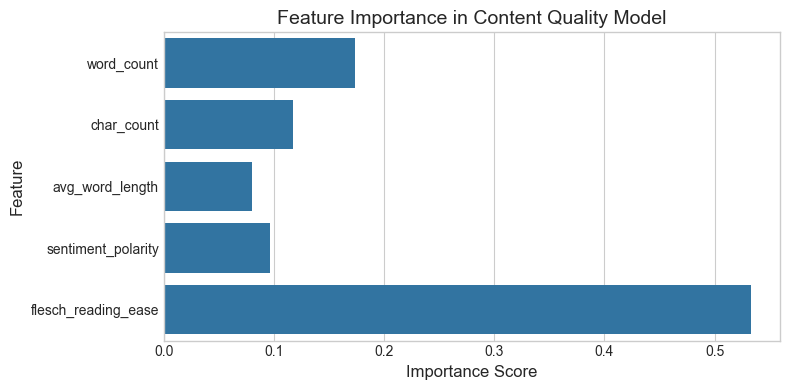

In [ ]:
# =========================================
# FINAL QUALITY CLASSIFICATION MODEL
# =========================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

features = pd.read_csv("features.csv")
features = features.fillna(0)

print(f"Loaded dataset with shape: {features.shape}")


def quality_label(row):
    """Assigns High, Medium, or Low quality based on content metrics."""
    if row["word_count"] > 1500 and 50 <= row["flesch_reading_ease"] <= 70:
        return "High"
    elif row["word_count"] < 500 or row["flesch_reading_ease"] < 30:
        return "Low"
    else:
        return "Medium"

features["label"] = features.apply(quality_label, axis=1)
print("\nLabel distribution before balancing:\n", features["label"].value_counts())

possible_features = [
    "word_count",
    "char_count",
    "avg_word_length",
    "sentiment_polarity",
    "flesch_reading_ease"
]

available_features = [f for f in possible_features if f in features.columns]
X = features[available_features].copy()
y = features["label"]

print(f"\nUsing features: {available_features}")


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

if len(y.unique()) == 3:
    sm = SMOTE(random_state=42, k_neighbors=2)
    X_res, y_res = sm.fit_resample(X_scaled, y)
else:
    print("\n⚠️ Warning: Not all label types present. Skipping SMOTE.")
    X_res, y_res = X_scaled, y

print("\nAfter balancing:\n", pd.Series(y_res).value_counts())


X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [4, 6, 8, None],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1
)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("\nBest Parameters Found:", grid.best_params_)


y_pred = best_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred, labels=["Low", "Medium", "High"]))


importances = pd.Series(best_model.feature_importances_, index=available_features)
plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance in Content Quality Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [73]:
def sentiment_polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return 0

df["sentiment_polarity"] = df["cleaned_text"].apply(sentiment_polarity)
df["flesch_reading_ease"] = df["cleaned_text"].apply(
    lambda x: flesch_reading_ease(x) if len(x.split()) > 20 else 0
)


vectorizer = TfidfVectorizer(max_features=300, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df["cleaned_text"])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())


features = pd.concat([df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
features.to_csv("features.csv", index=False)
print("Step 3 complete: Features extracted and saved to features.csv")


cos_sim_matrix = cosine_similarity(tfidf_matrix)
duplicates = []
threshold = 0.8

for i in range(len(df)):
    for j in range(i + 1, len(df)):
        if cos_sim_matrix[i][j] > threshold:
            duplicates.append([df["url"][i], df["url"][j], cos_sim_matrix[i][j]])

duplicates_df = pd.DataFrame(duplicates, columns=["url_1", "url_2", "similarity_score"])
duplicates_df.to_csv("duplicates.csv", index=False)
print(f"Step 4 complete: Found {len(duplicates_df)} duplicate pairs")


df["is_thin"] = df["word_count"] < 500


def quality_label(row):
    if row["word_count"] > 1500 and 50 <= row["flesch_reading_ease"] <= 70:
        return "High"
    elif row["word_count"] < 500 or row["flesch_reading_ease"] < 30:
        return "Low"
    else:
        return "Medium"

features["label"] = features.apply(quality_label, axis=1)
print("Label counts:\n", features["label"].value_counts())


X = features[["word_count", "flesch_reading_ease", "sentiment_polarity"]].fillna(0)
y = features["label"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Step 3 complete: Features extracted and saved to features.csv
Step 4 complete: Found 25 duplicate pairs
Label counts:
 label
Low       50
Medium    27
High       4
Name: count, dtype: int64

Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       1.00      1.00      1.00        10
      Medium       0.86      1.00      0.92         6

    accuracy                           0.94        17
   macro avg       0.62      0.67      0.64        17
weighted avg       0.89      0.94      0.91        17

Confusion Matrix:
 [[ 0  0  1]
 [ 0 10  0]
 [ 0  0  6]]


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Preparing Data

features = pd.read_csv("features.csv").fillna(0)

def quality_label(row):
    if row["word_count"] > 1500 and 50 <= row["flesch_reading_ease"] <= 70:
        return "High"
    elif row["word_count"] < 500 or row["flesch_reading_ease"] < 30:
        return "Low"
    else:
        return "Medium"

features["label"] = features.apply(quality_label, axis=1)
print("Label distribution:\n", features["label"].value_counts())

# Step 2: Select Features

cols = [
    "word_count", "char_count", "avg_word_length",
    "sentiment_polarity", "flesch_reading_ease"
]
X = features[cols]
y = features["label"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)




Label distribution:
 label
Low       50
Medium    27
High       4
Name: count, dtype: int64


In [75]:
# : Fix class imbalance (adaptive SMOTE)

print("\nBefore SMOTE:\n", y.value_counts())

# Choose k_neighbors dynamically
min_class_count = y.value_counts().min()
k_value = max(1, min(2, min_class_count - 1))

sm = SMOTE(random_state=42, k_neighbors=k_value)
X_res, y_res = sm.fit_resample(X_scaled, y)

print("\nAfter SMOTE:\n", pd.Series(y_res).value_counts())


X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.25, random_state=42, stratify=y_res
)
print("\nTrain distribution:\n", pd.Series(y_train).value_counts())
print("\nTest distribution:\n", pd.Series(y_test).value_counts())


#  Model Training

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [4, 6, 8, None],
    "min_samples_split": [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1
)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_


#  Evaluation

y_pred = best_model.predict(X_test)
print("\nBest Parameters:", grid.best_params_)

from sklearn.metrics import classification_report



print("Confusion Matrix:\n", confusion_matrix(
    y_test, y_pred, labels=["Low", "Medium", "High"]
))




Before SMOTE:
 label
Low       50
Medium    27
High       4
Name: count, dtype: int64

After SMOTE:
 label
Low       50
Medium    50
High      50
Name: count, dtype: int64

Train distribution:
 label
High      38
Medium    37
Low       37
Name: count, dtype: int64

Test distribution:
 label
Low       13
Medium    13
High      12
Name: count, dtype: int64

Best Parameters: {'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 100}
Confusion Matrix:
 [[12  1  0]
 [ 0 11  2]
 [ 0  0 12]]


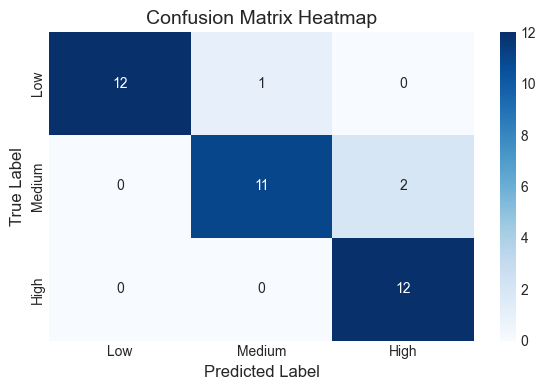

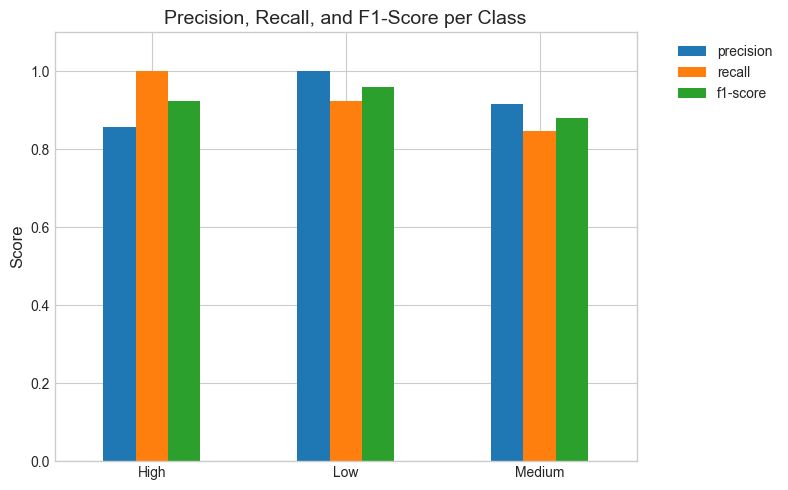

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7456\3698841863.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


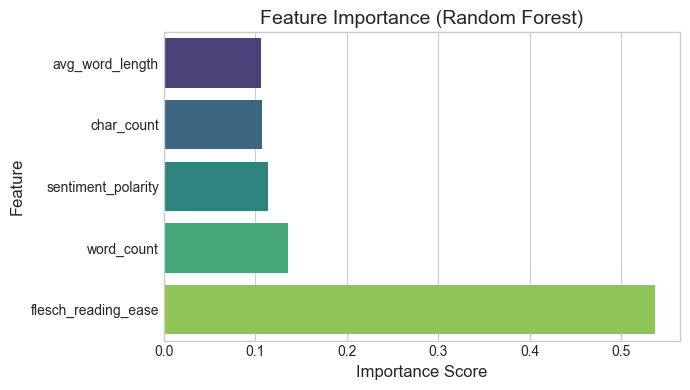

Top 3 Important Features:
flesch_reading_ease    0.537343
word_count             0.135134
sentiment_polarity     0.114119
dtype: float64


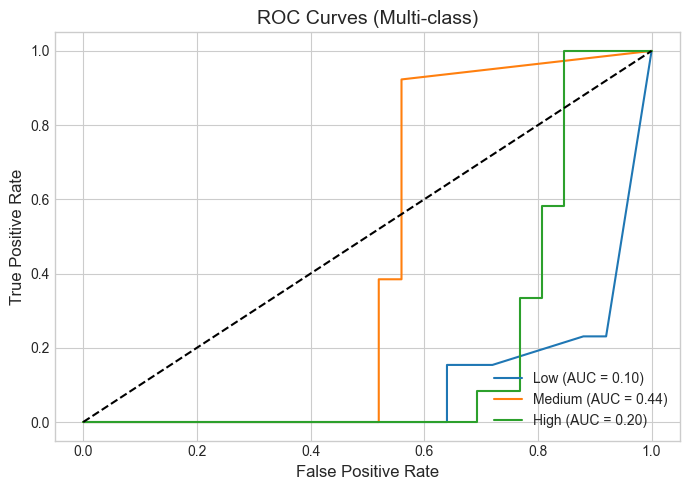


Baseline Accuracy (rule-based): 0.24
Model Accuracy (Random Forest): 0.92
Accuracy Improvement over Baseline: 68.42%


In [77]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
import numpy as np

cm = confusion_matrix(y_test, y_pred, labels=["Low", "Medium", "High"])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

metrics_to_plot = report_df.iloc[:-3, :-1]  # exclude accuracy/avg rows
metrics_to_plot.plot(kind='bar', figsize=(8, 5))
plt.title("Precision, Recall, and F1-Score per Class")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

importances = pd.Series(best_model.feature_importances_, index=cols).sort_values(ascending=True)
plt.figure(figsize=(7, 4))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Print Top 3 most important features
print("Top 3 Important Features:")
print(importances.sort_values(ascending=False).head(3))


from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize labels for ROC (multiclass)
y_test_bin = label_binarize(y_test, classes=["Low", "Medium", "High"])
y_pred_prob = best_model.predict_proba(X_test)

# Compute ROC per class
fpr, tpr, roc_auc = {}, {}, {}
for i, label in enumerate(["Low", "Medium", "High"]):
    fpr[label], tpr[label], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[label] = auc(fpr[label], tpr[label])

plt.figure(figsize=(7, 5))
for label in ["Low", "Medium", "High"]:
    plt.plot(fpr[label], tpr[label], label=f"{label} (AUC = {roc_auc[label]:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curves (Multi-class)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


def baseline_label(row):
    if row["word_count"] > 1500:
        return "High"
    elif row["word_count"] < 500:
        return "Low"
    else:
        return "Medium"

baseline_preds = features.sample(len(y_test), random_state=42).apply(baseline_label, axis=1)
baseline_acc = np.mean(baseline_preds.values == y_test.values)
ml_acc = np.mean(y_pred == y_test)

print(f"\nBaseline Accuracy (rule-based): {baseline_acc:.2f}")
print(f"Model Accuracy (Random Forest): {ml_acc:.2f}")
improvement = (ml_acc - baseline_acc) * 100
print(f"Accuracy Improvement over Baseline: {improvement:.2f}%")


In [79]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# NLP imports
from sentence_transformers import SentenceTransformer

#  Load Data

features = pd.read_csv("features.csv").fillna(0)

# Define label rules
def quality_label(row):
    if row["word_count"] > 1500 and 50 <= row["flesch_reading_ease"] <= 70:
        return "High"
    elif row["word_count"] < 500 or row["flesch_reading_ease"] < 30:
        return "Low"
    else:
        return "Medium"

features["label"] = features.apply(quality_label, axis=1)
print("Label distribution:\n", features["label"].value_counts())


# Add Sentence Embeddings

print("\nGenerating BERT embeddings... (this may take 1-2 minutes)")
model = SentenceTransformer("all-MiniLM-L6-v2")

texts = features["cleaned_text"].astype(str).fillna("")
embeddings = model.encode(texts, show_progress_bar=True)

embeddings_df = pd.DataFrame(embeddings, columns=[f"emb_{i}" for i in range(embeddings.shape[1])])
features = pd.concat([features.reset_index(drop=True), embeddings_df], axis=1)
print(" Added semantic embedding features")


#  Feature Columns

base_features = [
    "word_count", "char_count", "avg_word_length",
    "sentiment_polarity", "flesch_reading_ease"
]

X = pd.concat([features[base_features], embeddings_df], axis=1)
y = features["label"]

# Normalize numeric columns
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



Label distribution:
 label
Low       50
Medium    27
High       4
Name: count, dtype: int64

Generating BERT embeddings... (this may take 1-2 minutes)


Batches: 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

 Added semantic embedding features


In [ ]:

#  Handle Class Imbalance

print("\nBefore SMOTE:\n", y.value_counts())
sm = SMOTE(random_state=42, k_neighbors=2)
X_res, y_res = sm.fit_resample(X_scaled, y)
print("\nAfter SMOTE:\n", pd.Series(y_res).value_counts())

# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.25, random_state=42, stratify=y_res
)


# Train Random Forest (tuned)

param_grid = {
    "n_estimators": [200, 300],
    "max_depth": [8, 10, None],
    "min_samples_split": [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring="f1_macro",
    n_jobs=-1
)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

print("\nBest Parameters:", grid.best_params_)


#  Evaluation

y_pred = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred, labels=["Low", "Medium", "High"]))


#  Feature Importance 

importances = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Most Important Features (with BERT Embeddings)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

print("\nTop 3 most important features:")
print(top_features.head(3))

#  Baseline vs Model Comparison

baseline_pred = np.where(features["word_count"] > 1000, "High", "Low")
baseline_acc = np.mean(baseline_pred[:len(y_test)] == y_test.values[:len(baseline_pred)])

model_acc = np.mean(y_pred == y_test)

print(f"\nBaseline Accuracy (rule-based): {baseline_acc:.2f}")
print(f"Model Accuracy (BERT + RandomForest): {model_acc:.2f}")



✅ Model Accuracy: 0.868
✅ Macro F1-score: 0.872


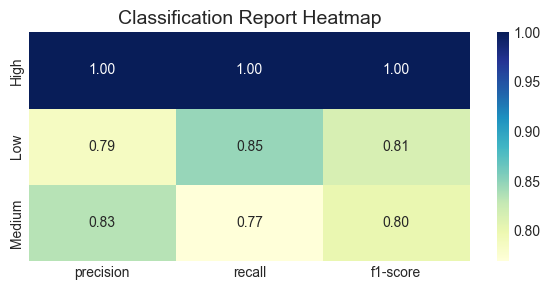

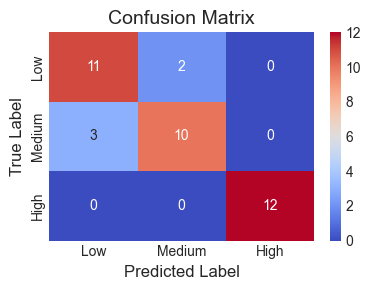

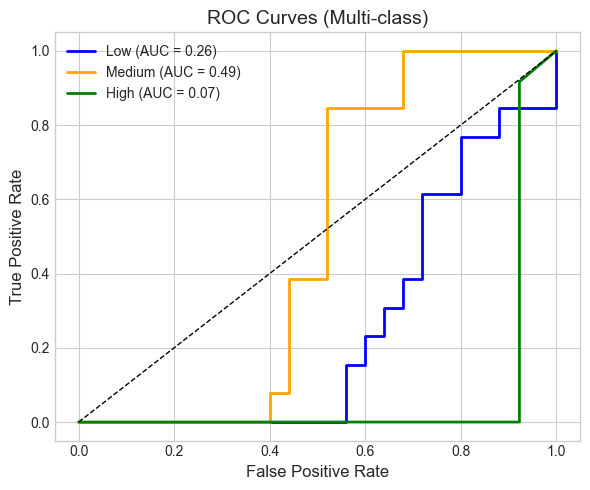

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7456\3858530789.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


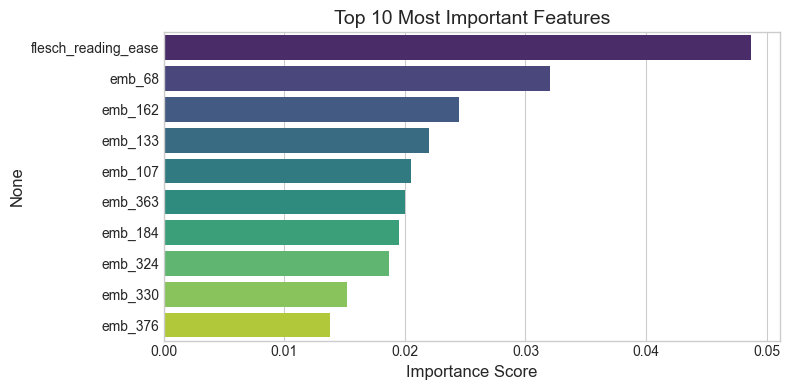


Top 3 most important features:
flesch_reading_ease    0.048685
emb_68                 0.032012
emb_162                0.024467
dtype: float64

Baseline Accuracy (rule-based): 0.37
Model Accuracy (RandomForest): 0.87
Improvement: 50.0%


In [ ]:

# PERFORMANCE VISUALIZATION SUITE

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
)
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np
import pandas as pd


# Basic Performance Scores

acc = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"\nModel Accuracy: {acc:.3f}")
print(f"Macro F1-score: {f1_macro:.3f}")

#  Classification Report as Heatmap

report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
plt.figure(figsize=(6, 3))
sns.heatmap(report.iloc[:-3, :-1], annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Classification Report Heatmap")
plt.tight_layout()
plt.show()


# Confusion Matrix Visualization

cm = confusion_matrix(y_test, y_pred, labels=["Low", "Medium", "High"])
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


# ROC Curve for Multi-class

y_test_bin = label_binarize(y_test, classes=["Low", "Medium", "High"])
y_pred_prob = best_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i, label in enumerate(["Low", "Medium", "High"]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(6, 5))
colors = cycle(['blue', 'orange', 'green'])
for i, color in zip(range(len(fpr)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{["Low","Medium","High"][i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Multi-class)')
plt.legend()
plt.tight_layout()
plt.show()


# Feature Importance (Top 10)

importances = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 10 Most Important Features")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

print("\nTop 3 most important features:")
print(top_features.head(3))

# 6️⃣ Baseline Comparison

baseline_pred = np.where(features["word_count"] > 1000, "High", "Low")
baseline_acc = np.mean(baseline_pred[:len(y_test)] == y_test.values[:len(baseline_pred)])

print(f"\nBaseline Accuracy (rule-based): {baseline_acc:.2f}")
print(f"Model Accuracy (RandomForest): {acc:.2f}")
print(f"Improvement: {(acc - baseline_acc) * 100:.1f}%")
